In [1]:
import soil
import networkx as nx
import numpy
%pylab inline

from soil import *
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sbn

sbn.set_context("talk", font_scale=1)

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Populating the interactive namespace from numpy and matplotlib


In [2]:
data = analysis.read_csv('soil_output/Politica_2/Politica_2_trial_0.csv', keys=None, convert_types=False)
data_fights = data['num_of_fights']
data_drunk = data['drunk']
ages = data['age']
genders = data ['gender']
data_intoxicate = data['intoxicated']

In [3]:
num_agents = 1500

# FIGHTS
#### - Fights per step
#### - Percentage of fights per gender
#### - Percentage of fights per age


In [4]:
fights_step = []

for index, row in data_fights.iterrows(): 
    n=0
    for column in data_fights:
        if row[column] == '1':
            n+=0.5
    fights_step.insert(index,int(n))

for inte in range(len(fights_step),38):
    fights_step.insert(inte, fights_step[len(fights_step)-1])

num_fights = fights_step[37]
num_fights_perc = round((num_fights/num_agents)*100,2)
print(fights_step)
print(num_fights_perc)


[0, 0, 0, 0, 1, 1, 3, 8, 11, 12, 17, 18, 19, 20, 25, 28, 29, 30, 30, 30, 32, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34]
2.27


In [5]:
fights_step_df = pd.DataFrame(fights_step, columns = ['Num_fights']) 

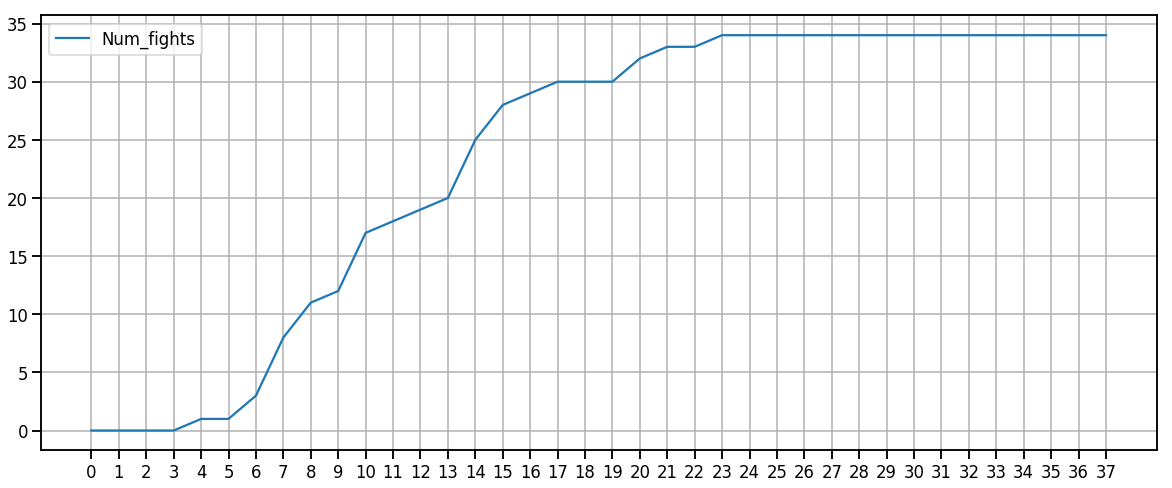

<Figure size 432x288 with 0 Axes>

In [6]:
fig = fights_step_df.plot(figsize=[20,8], grid=True)
major_ticks_x = np.arange(0, 38, 1)
major_ticks_y = np.arange(0, num_fights+2, 5)
fig.set_xticks(major_ticks_x)
fig.set_yticks(major_ticks_y)
fig = plt.figure()

In [7]:
genders_step_0 = [0] * num_agents
ages_step_0 = [0] * num_agents

#print(genders_step_0)
for column in genders:
    #print('AGENT id: {} -------------------------------------------'.format(column))
    for index, row in genders.iterrows():
        #print('Step: {}'.format(index))
        #print('ROW: {}'.format(row))
        
        genders_step_0[int(column)] = row[column]
        break
        
for column in ages:
    for index, row in ages.iterrows():
        
        ages_step_0[int(column)] = row[column]
        break
 

#print(ages_step_0[13])
#print(genders_step_0[13])  

In [8]:
genders_fight = [0,0]

for column in data_fights:
    #print('AGENT id: {} -------------------------------------------'.format(column))
    for index, row in data_fights.iterrows():
        #print('Index: {} -------------------------------------------'.format(row[column]))
        if row[column]=='1':
            #print('BREAK!!! ################################################################3')
            if genders_step_0[int(column)]=='male':
                genders_fight[0]=genders_fight[0]+1
            else:
                genders_fight[1]=genders_fight[1]+1
            break
          
tot = 0
for index in range(len(genders_fight)):
    tot += genders_fight[index]
    

for index in range(len(genders_fight)):
    genders_fight[index] = round((genders_fight[index]/tot)*100,2)
print(genders_fight)


[91.18, 8.82]


In [9]:

ages_fight = [0,0,0]



for column in data_fights:
    for index, row in data_fights.iterrows():
        if row[column]=='1':
            if ages_step_0[int(column)]=='15':
                ages_fight[0]=ages_fight[0]+1
            elif ages_step_0[int(column)]=='20':
                ages_fight[1]=ages_fight[1]+1
            else:
                ages_fight[2]=ages_fight[2]+1
         
            break
          
            
tot = 0
for index in range(len(ages_fight)):
    tot += ages_fight[index]
    
for index in range(len(ages_fight)):
    ages_fight[index] = round((ages_fight[index]/tot)*100,2)
print(ages_fight)


[39.71, 38.24, 22.06]


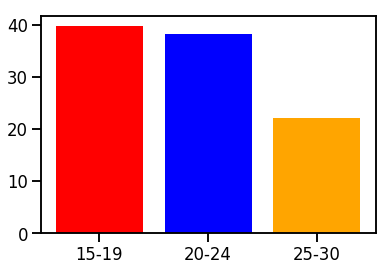

In [10]:
bars = ('15-19', '20-24', '25-30')
y_pos = np.arange(len(bars))
plt.bar(y_pos, ages_fight, color=['red', 'blue', 'orange'])
plt.xticks(y_pos, bars)
plt.show()


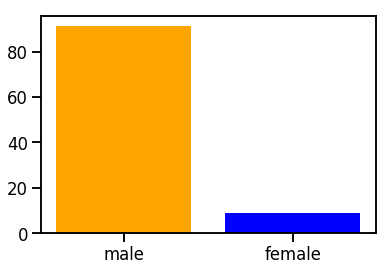

In [11]:
bars = ('male', 'female')
y_pos = np.arange(len(bars))
plt.bar(y_pos, genders_fight, color=['orange', 'blue'])
plt.xticks(y_pos, bars)
plt.show()

# DRUNKS
#### Drunks per step
#### Percentage of drunks per gender
#### Percentage of drunks per age

In [12]:
drunks_step = []

for index, row in data_drunk.iterrows():
    #print("ROW {}".format(row))
    #print("INDEX {}".format(index))
    n=0
    for column in data_drunk:
        #print("AGENT_ID {}".format(column))
        if row[column] == 'True':
            n+=1
    
    drunks_step.insert(index,int(n))
    

for inte in range(len(drunks_step),38):
    drunks_step.insert(inte, drunks_step[len(drunks_step)-1])

num_drunks = drunks_step[37]

num_drunks_perc = round((num_drunks/num_agents)*100,2)
print(drunks_step)
print(num_drunks_perc)


[0, 0, 0, 0, 2, 6, 12, 22, 36, 46, 57, 62, 64, 71, 86, 92, 98, 102, 108, 112, 117, 120, 123, 124, 124, 125, 126, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127]
8.47


In [13]:
drunks_step_df = pd.DataFrame(drunks_step, columns = ['Num_drunks'])  

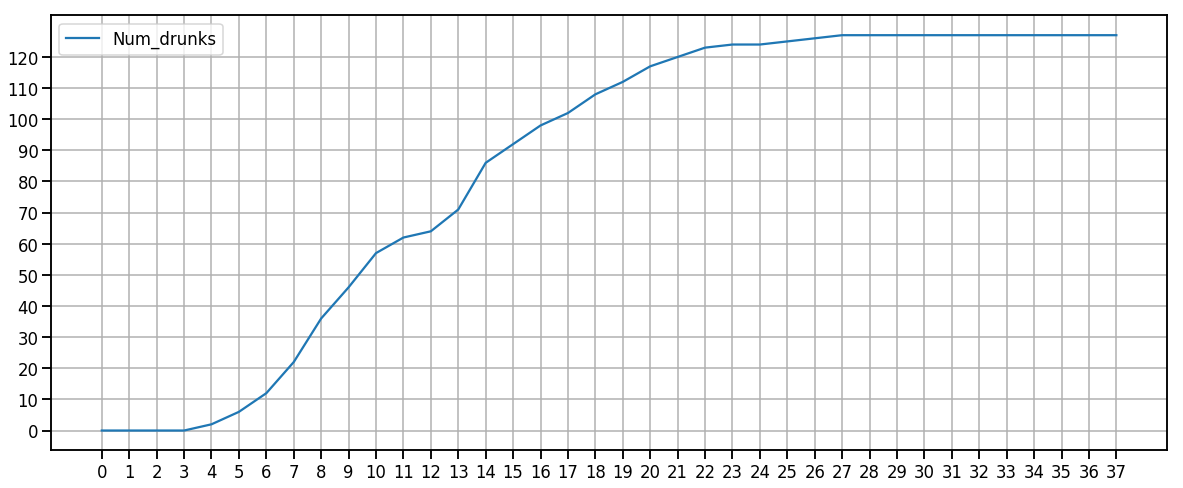

<Figure size 432x288 with 0 Axes>

In [14]:
fig = drunks_step_df.plot(figsize=[20,8], grid=True)
major_ticks_x = np.arange(0, 38, 1)
major_ticks_y = np.arange(0, num_drunks+2, 10)
fig.set_xticks(major_ticks_x)
fig.set_yticks(major_ticks_y)
fig = plt.figure()

In [15]:

genders_drunk = [0,0]

 
for column in data_drunk:
    #print("AGENT_ID {}".format(column))
    for index, row in data_drunk.iterrows():
        #print("STEP {}".format(index))
        if row[column]=='True':
            if genders_step_0[int(column)]=='male':
                genders_drunk[0]=genders_drunk[0]+1
                #print("{} is drunk and is male".format(int(column)))
            else:
                genders_drunk[1]=genders_drunk[1]+1
                #print("{} is drunk and is female".format(int(column)))
            break
          
tot = 0
for index in range(len(genders_drunk)):
    tot += genders_drunk[index]

print(genders_drunk)
for index in range(len(genders_drunk)):
    genders_drunk[index] = round((genders_drunk[index]/tot)*100,2)
print(genders_drunk)

[74, 53]
[58.27, 41.73]


In [16]:

ages_drunk = [0,0,0]
    
for column in data_drunk:
    for index, row in data_drunk.iterrows():
        if row[column]=='True':
            if ages_step_0[int(column)]=='15':
                ages_drunk[0]=ages_drunk[0]+1
            elif ages_step_0[int(column)]=='20':
                ages_drunk[1]=ages_drunk[1]+1
            else:
                ages_drunk[2]=ages_drunk[2]+1
         
            break
          
            
tot = 0
for index in range(len(ages_drunk)):
    tot += ages_drunk[index]
    
for index in range(len(ages_drunk)):
    ages_drunk[index] = round((ages_drunk[index]/tot)*100,2)
print(ages_drunk)

[51.18, 24.41, 24.41]


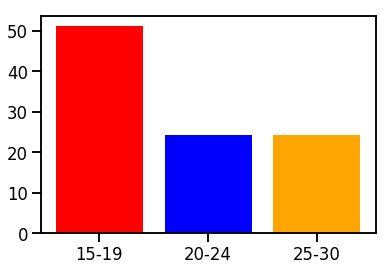

In [17]:
bars = ('15-19', '20-24', '25-30')
y_pos = np.arange(len(bars))
plt.bar(y_pos, ages_drunk, color=['red', 'blue', 'orange'])
plt.xticks(y_pos, bars)
plt.show()

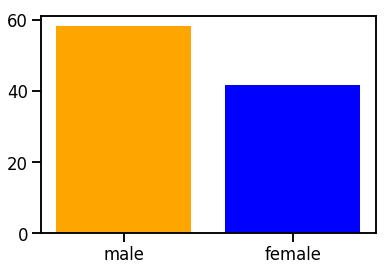

In [18]:
bars = ('male', 'female')
y_pos = np.arange(len(bars))
plt.bar(y_pos, genders_drunk, color=['orange', 'blue'])
plt.xticks(y_pos, bars)
plt.show()

# INTOXICATES
#### Int per step
#### Percentage of fights per gender
#### Percentage of fights per age

In [19]:
intoxicates_step = []

for index, row in data_intoxicate.iterrows():
    n=0
    for column in data_intoxicate:
        
        if row[column] == 'True':
            n+=1
    
    intoxicates_step.insert(index,int(n))
    

for inte in range(len(intoxicates_step),38):
    intoxicates_step.insert(inte, intoxicates_step[len(intoxicates_step)-1])

num_intoxicates = intoxicates_step[37]
num_intoxicates_perc = round((num_intoxicates/num_agents)*100,2)
print(intoxicates_step)
print(num_intoxicates_perc)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
0.2


In [20]:
intoxicates_step_df = pd.DataFrame(intoxicates_step, columns = ['Num_intoxicates']) 

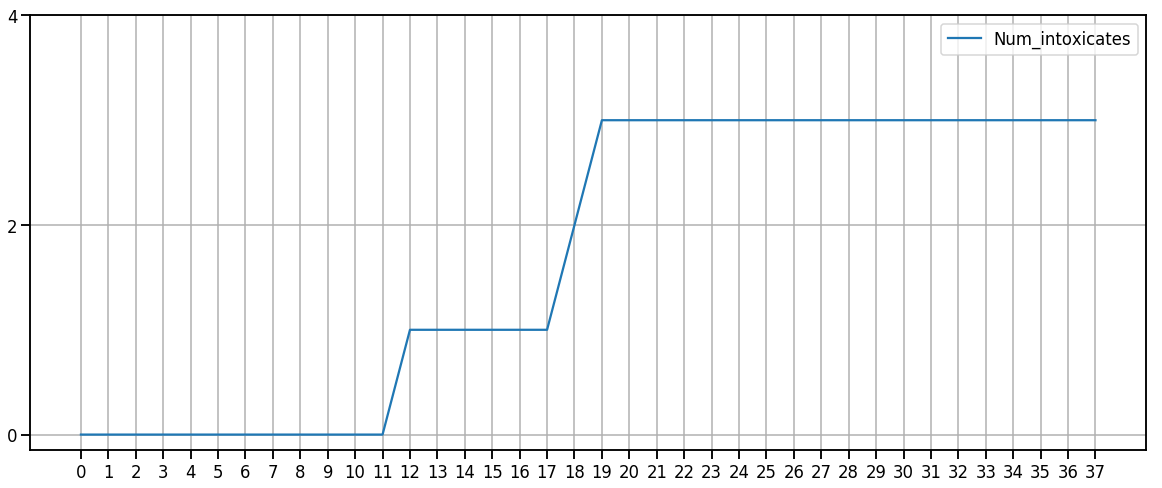

<Figure size 432x288 with 0 Axes>

In [21]:
fig = intoxicates_step_df.plot(figsize=[20,8], grid=True)
major_ticks_x = np.arange(0, 38, 1)
major_ticks_y = np.arange(0, num_intoxicates+2, 2)
fig.set_xticks(major_ticks_x)
fig.set_yticks(major_ticks_y)
fig = plt.figure()

In [22]:

genders_intoxicate = [0,0]
        
        
for column in data_intoxicate:
    for index, row in data_intoxicate.iterrows():
        if row[column]=='True':
            if genders_step_0[int(column)]=='male':
                genders_intoxicate[0]=genders_intoxicate[0]+1
            else:
                genders_intoxicate[1]=genders_intoxicate[1]+1
            break
          
tot = 0
for index in range(len(genders_intoxicate)):
    tot += genders_intoxicate[index]
    

for index in range(len(genders_intoxicate)):
    genders_intoxicate[index] = round((genders_intoxicate[index]/tot)*100,2)
print(genders_intoxicate)

[0.0, 100.0]


In [23]:

ages_intoxicate = [0,0,0]

for column in data_intoxicate:
    for index, row in data_intoxicate.iterrows():
        if row[column]=='True':
            if ages_step_0[int(column)]=='15':
                ages_intoxicate[0]=ages_intoxicate[0]+1
            elif ages_step_0[int(column)]=='20':
                ages_intoxicate[1]=ages_intoxicate[1]+1
            else:
                ages_intoxicate[2]=ages_intoxicate[2]+1
         
            break
print(ages_intoxicate)        
            
tot = 0
for index in range(len(ages_intoxicate)):
    tot += ages_intoxicate[index]
    
for index in range(len(ages_intoxicate)):
    ages_intoxicate[index] = round((ages_intoxicate[index]/tot)*100,2)
print(ages_intoxicate)


[0, 2, 1]
[0.0, 66.67, 33.33]


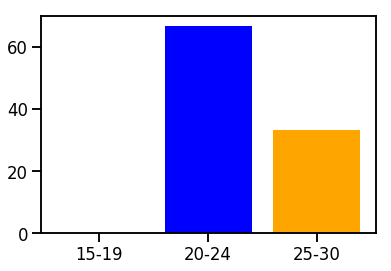

In [24]:
bars = ('15-19', '20-24', '25-30')
y_pos = np.arange(len(bars))
plt.bar(y_pos, ages_intoxicate, color=['red', 'blue', 'orange'])
plt.xticks(y_pos, bars)
plt.show()

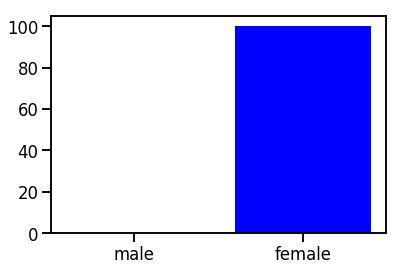

In [25]:
bars = ('male', 'female')
y_pos = np.arange(len(bars))
plt.bar(y_pos, genders_intoxicate, color=['orange', 'blue'])
plt.xticks(y_pos, bars)
plt.show()